# Customer Churn Analysis

### Import Libraries

In [1]:
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../Datasets/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dataset is having numeric and categorical columns.

### Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

The target variable in the data set is 'Churn' that is being represented by binary class and hence it is a classification problem.

In [3]:
#Checking the dataset shape
df.shape

(7043, 21)

Dataset is having 7043 rows and 21 columns (20 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Columns names are displayed where 'Income' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here, we can see columns are of type object and integer i.e. both categorical and numeric columns are there.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can not see any null values in the dataset. Column 'TotalCharges' is of object type which should be of float type.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i,' ',df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

customerID   object
Unique values :  7043
Value counts  :  0667-NSRGI    1
0103-CSITQ    1
7873-CVMAW    1
3133-PZNSR    1
6542-LWGXJ    1
             ..
2832-SCUCO    1
5590-ZSKRV    1
1478-VPOAD    1
3850-OKINF    1
3528-HFRIQ    1
Name: customerID, Length: 7043, dtype: int64
----------------------
gender   object
Unique values :  2
Value counts  :  Male      3555
Female    3488
Name: gender, dtype: int64
----------------------
SeniorCitizen   int64
Unique values :  2
Value counts  :  0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------------------
Partner   object
Unique values :  2
Value counts  :  No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------
Dependents   object
Unique values :  2
Value counts  :  No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------
tenure   int64
Unique values :  73
Value counts  :  1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: 

Column 'customerID' has 7043 unique values that is equal to total number of rows. 

Target column 'Churn' has 2 values but value counts have a huge difference hence there is class imbalance issue.

In [8]:
# Deleting column 'customerID'
df=df.drop(['customerID'], axis = 1)
df.shape

(7043, 20)

In [9]:
# Checking for blank values in column TotalCharges
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 blank values in column TotalCharges.

In [10]:
# Converting the datatype
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

'TotalCharges' has converted from object type to float datatype.

In [11]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count()

gender              22
SeniorCitizen       22
Partner             22
Dependents          22
tenure              22
PhoneService        22
MultipleLines       22
InternetService     22
OnlineSecurity      22
OnlineBackup        22
DeviceProtection    22
TechSupport         22
StreamingTV         22
StreamingMovies     22
Contract            22
PaperlessBilling    22
PaymentMethod       22
MonthlyCharges      22
TotalCharges        22
Churn               22
dtype: int64

In [12]:
# Checking for a duplicate row
df[(df['gender']=='Male')&(df['InternetService']=='DSL')&(df['MonthlyCharges']==45.7)&(df['TotalCharges']==45.7)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.7,45.7,Yes
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.7,45.7,Yes


In [13]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df[df.duplicated()].count().any()

False

There are no duplicate values in the dataset.

In [14]:
# Checking the final dataset shape
df.shape

(7021, 20)

### EDA and Visualizations

In [15]:
# Checking the null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are nulls in column TotalCharges.

In [16]:
# Checking NaN values in TotalCharges column
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
# Treating null values
df.dropna(axis=0, inplace=True)
df.isnull().sum().any()

False

<AxesSubplot:>

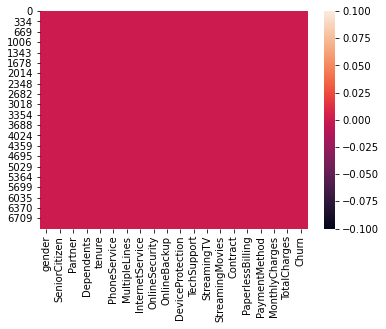

In [18]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

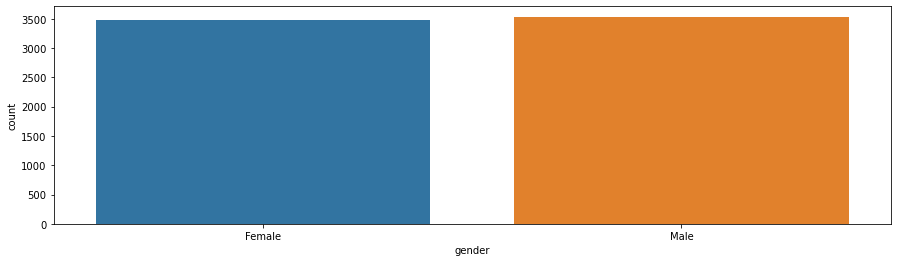

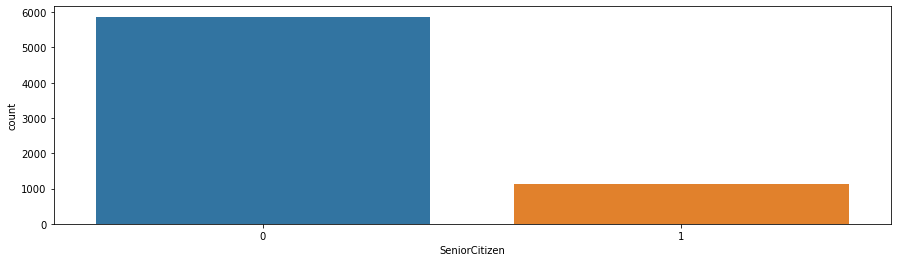

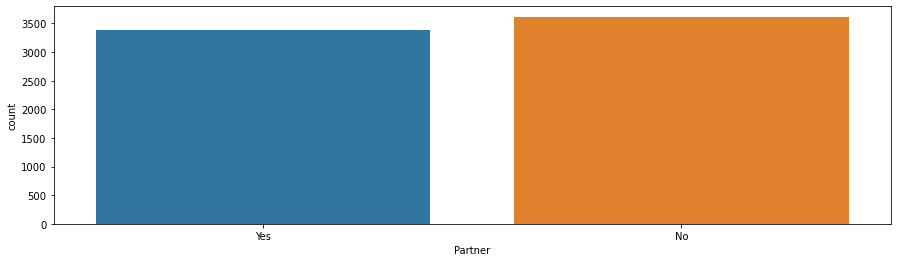

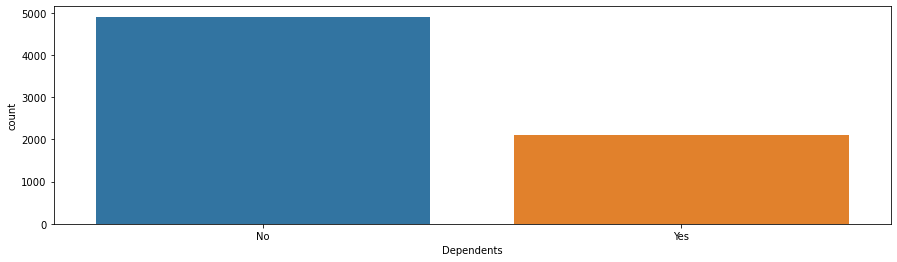

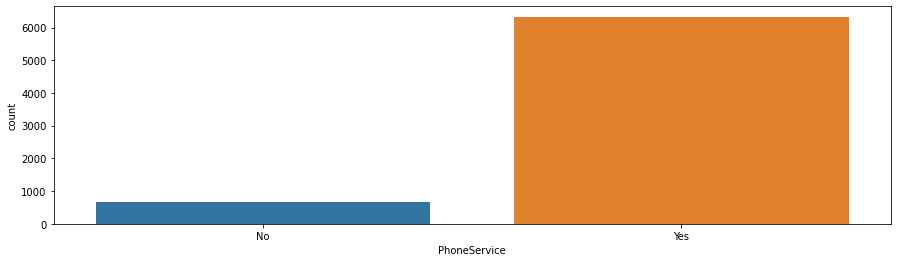

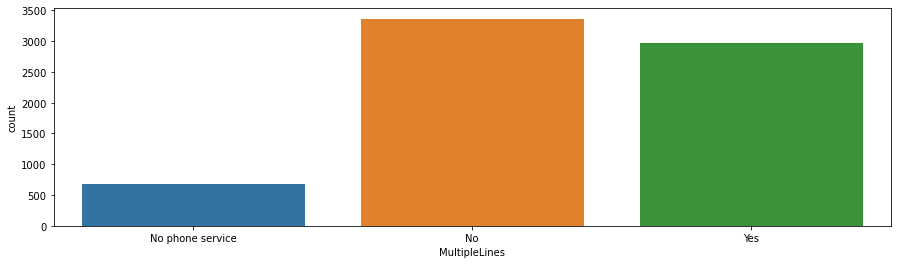

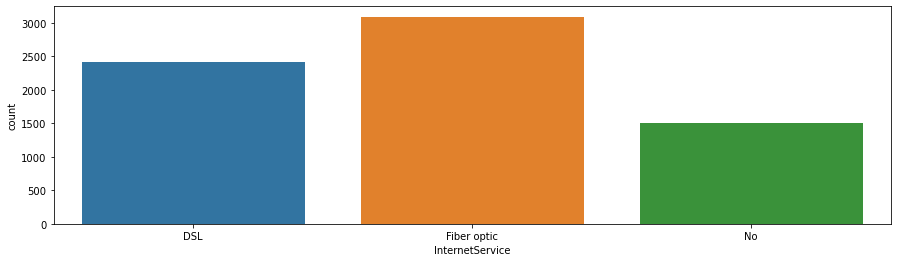

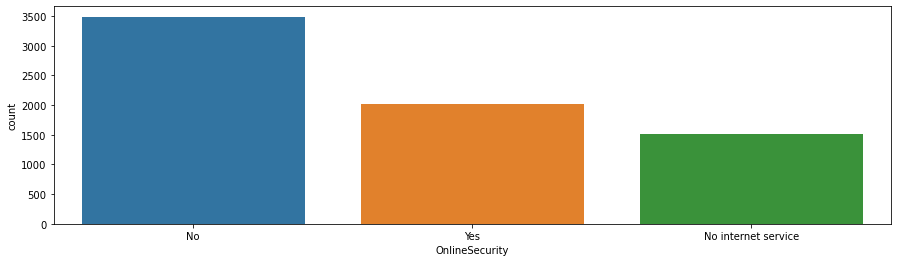

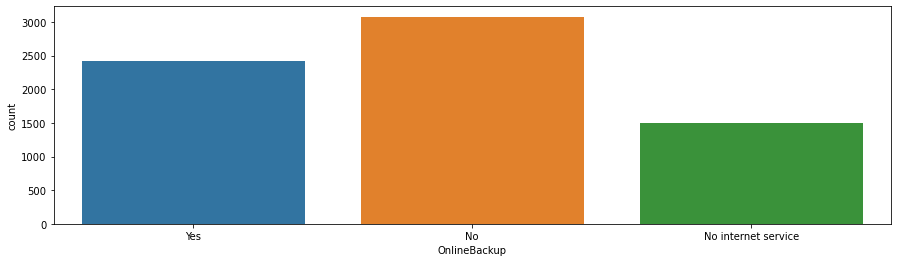

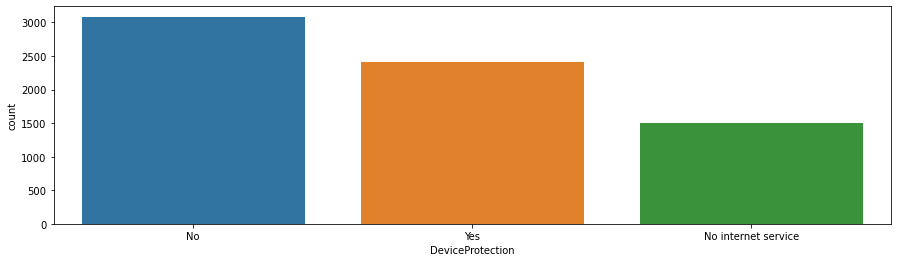

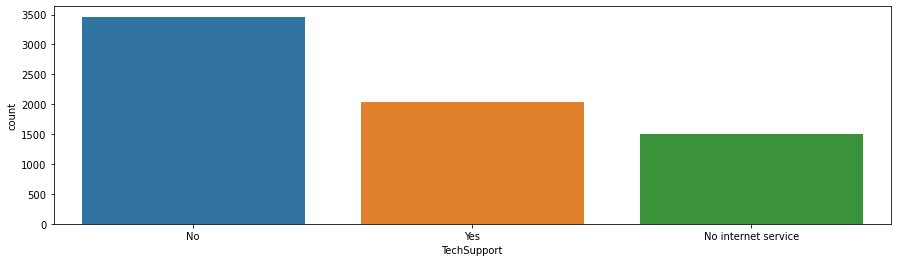

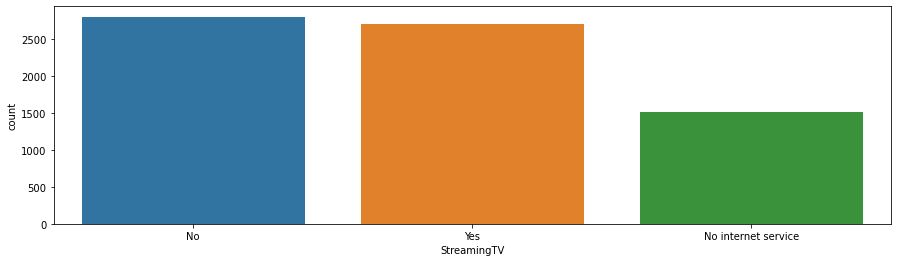

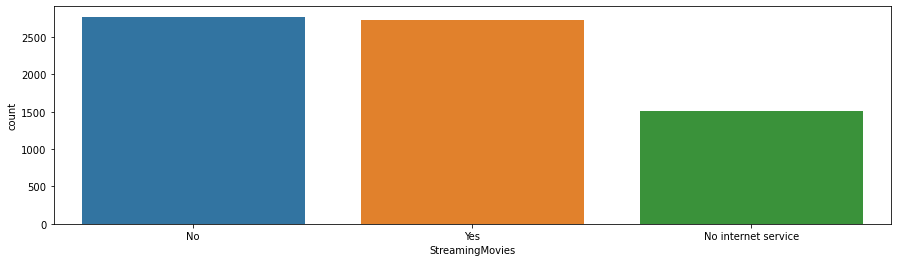

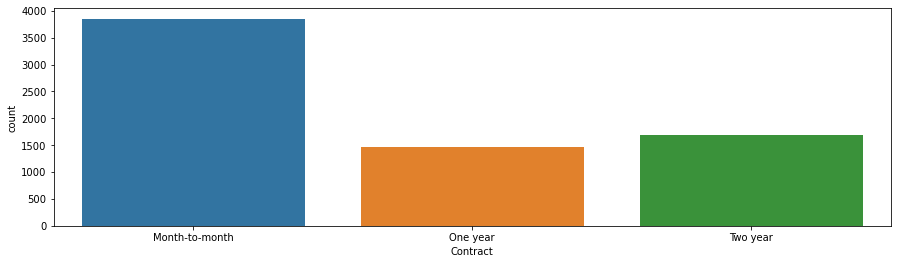

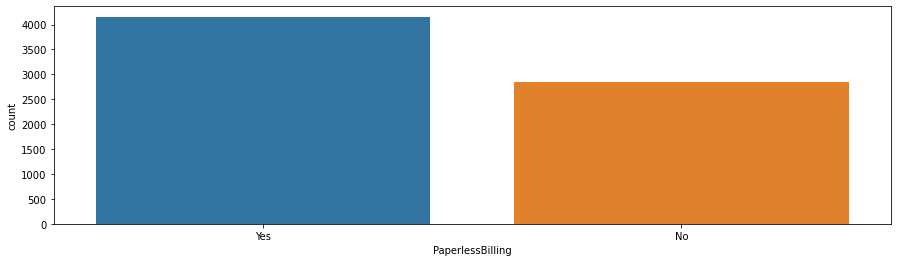

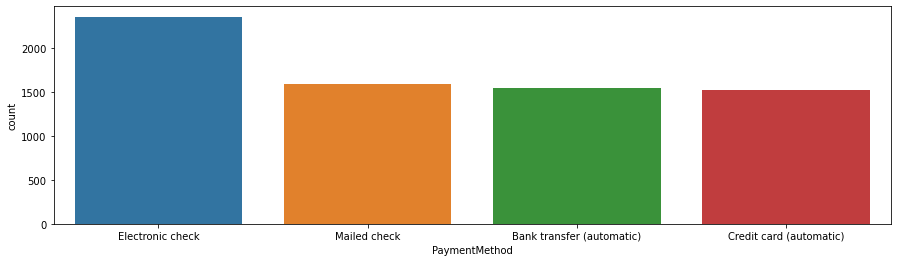

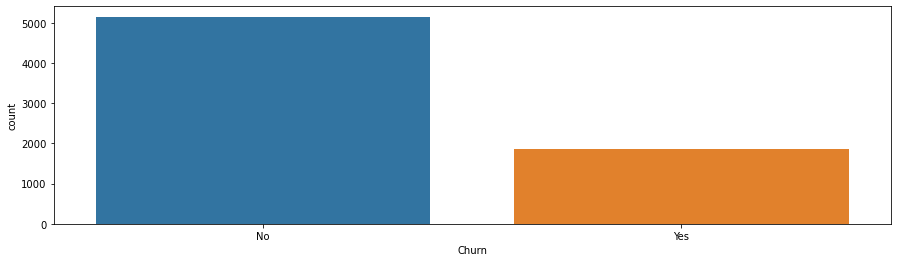

In [19]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if (df[i].nunique()<20) :
        plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

'gender' has almost similar counts of Male and Female. Huge number of customers are not 'SeniorCitizen' and very less are. 'Partner' column has No as dominating over Yes. High number of 'Dependents' are in No than in Yes. 'PhoneService' is available in majority. Highest votes are for No 'MultipleLines' followed by Yes and very few with No phone service. 'InternetService' highly use Fiber Optic and then DSL. Very few are there with No InternetService. 'OnlineSecurity' is a concern here as majority do not have it and approx a little more than half do have OnlineSecurity. No 'OnlineBackup' is also a major concern as majority is not having this service. For 'DeviceProtection', mostly customers do not have this service. 'TechSupport' is not available for high number of people but more than half do have this service. Count for 'StreamingTV' is almost equal for both Yes and No and same observation is for 'StreamingMovies'. 'Contract' taken is majorly Month-to-Month then for Two years and least for One year. 'PaperlessBilling' is mostly available for all the customers. 'PaymentMethon' opted is majorly Electronic check.

'Churn' as No has a huge count than Yes and since this is a target variable this columns needs class balancing.

In [20]:
# Describe dataset
df.describe()
#df.describe(include='all')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


'SeniorCitizen' have values 0 and 1. 'tenure' has values in range 0-72. 'MonthlyCharges' has values in range 18 to 119. 'TotalCharges' has values in range of 18 to 8685.

Columns 'tenure','TotalCharges' has mean>median hence a slight right skewness is there and Column 'MonthlyCharges' has left skewness as mean<median. The difference between 75% and max values seem okay but outliers might be there. 

Standard deviation seems very high for 'TotalCharges' column.

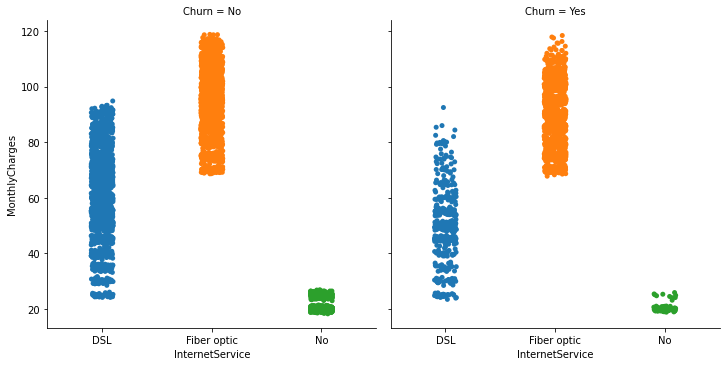

In [21]:
# Category plot for categorical data
sns.catplot(x='InternetService',y='MonthlyCharges',data=df, col='Churn')

'MonthlyCharges' are highest for Fiber optic as 'InternetService' and Lowest for No InternetService. For DSL as InternetService 'MonthlyCharges' are above 20 and remains under 100.

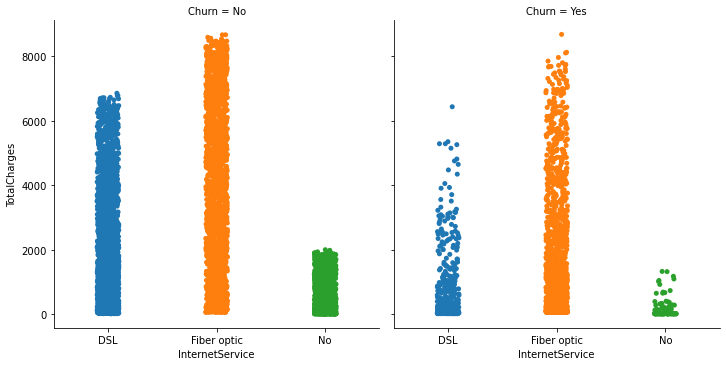

In [22]:
sns.catplot(x='InternetService',y='TotalCharges',data=df, col='Churn')

For Churned customers, with increae in 'TotalCharges', 'InternetService' started getting declined. While for not churned customers Internet Service with increase in TotalCharges remains almost similar.

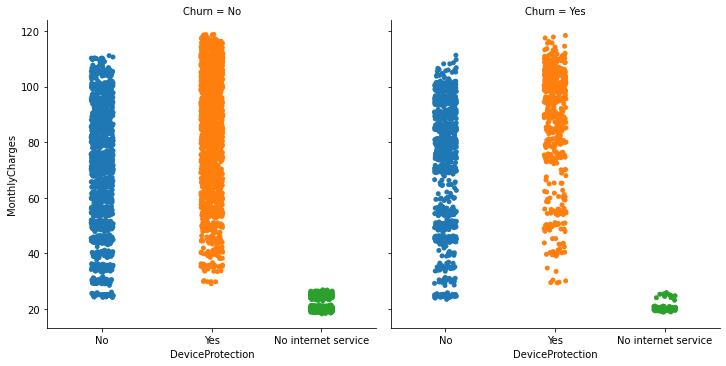

In [23]:
sns.catplot(x='DeviceProtection',y='MonthlyCharges',data=df, col='Churn')

'DeviceProtection' is less with less 'MonthlyCharges' comparatively with high 'MonthlyCharges'. Least are with No internet service. 

In [24]:
# Pivot table showing counts
pd.crosstab(df['Churn'],df['TechSupport'])

TechSupport,No,No internet service,Yes
Churn,,,
No,2026,1397,1730
Yes,1438,109,310


Majority of Churned customers do not have any TechSupport. Highest customers are in no TechSupport and are not churned.

In [25]:
pd.crosstab(df['Churn'],df['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2036,1397,1720
Yes,1453,109,295


Majority of Churned customers do not have any OnlineSecurity. Highest customers are in no OnlineSecurity and are not churned.

In [26]:
pd.crosstab(df['Churn'],df['PaymentMethod'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1286
Yes,258,232,1065,302


Majority of Churned customers have Electronic check	as 'PaymentMethod' and not churned customers are in approx equal count in all the 'PaymentMethod'(s).

In [27]:
pd.crosstab(df['Churn'],df['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2210,1306,1637
Yes,1643,166,48


Churned customers are mostly in Month-to-Month 'Contract' and least are in Two year 'Contract'.

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

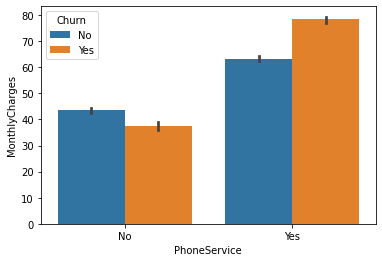

In [28]:
# Visualizing with barplot
sns.barplot(x='PhoneService',y='MonthlyCharges',data=df, hue='Churn')

Most of the Churned customers have PhoneService and high MonthlyCharges than non-churned. Churned are less with less MonthlyCharges as compared to non-churned, both with no phone service.

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

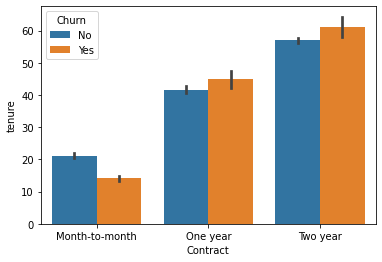

In [29]:
sns.barplot(x='Contract',y='tenure',data=df, hue='Churn')

Customers with 'Contract' as Two year have the highest 'tenure' followed by One year Contract and least tenure is for Month-to-Month Contract. Churned rate is high in One year and Two year of contracts whereas least churned and churned compared to non-churned are least in Month-to-Month 'Contract'.

<AxesSubplot:xlabel='DeviceProtection', ylabel='TotalCharges'>

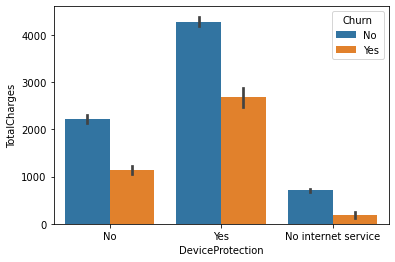

In [30]:
sns.barplot(x='DeviceProtection',y='TotalCharges',data=df, hue='Churn')

High number of customers are having 'DeviceProtection' and high 'TotalCharges' and least do not have internet service with very less 'TotalCharges'. Also, majority of Churned employees have 'DeviceProtection' but a big number of it are not churned as well with highest 'TotalCharges'.

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

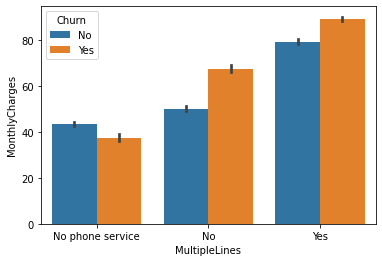

In [31]:
sns.barplot(x='MultipleLines',y='MonthlyCharges',data=df, hue='Churn')

'MonthlyCharges' are highest for customers having 'MultipleLines' and among which high number of customers are churned. 'MonthlyCharges' are least for customers having 'No phone service' and among which high number of customers are not churned. 

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

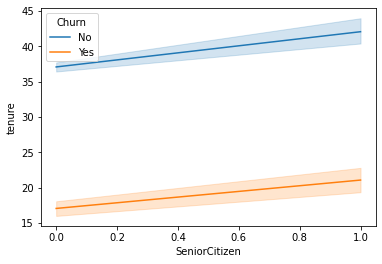

In [32]:
# Visualization with lineplot
sns.lineplot(x='SeniorCitizen',y='tenure',data=df,hue='Churn')

'tenure' w.r.t 'SeniorCitizen' is less for Churned customers and high for not churned customers.

<AxesSubplot:xlabel='MultipleLines', ylabel='tenure'>

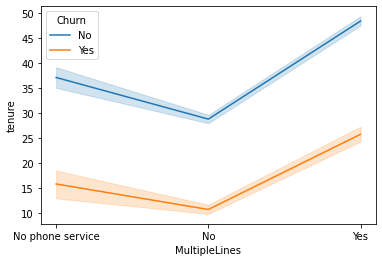

In [33]:
sns.lineplot(x='MultipleLines',y='tenure',data=df,hue='Churn')

'tenure' is less for all categories of 'MultipleLines' for churned customers and 'tenure' is high for non-churned customers.

<AxesSubplot:xlabel='TechSupport', ylabel='MonthlyCharges'>

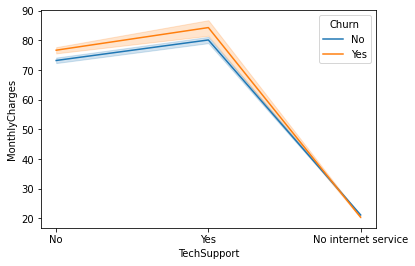

In [34]:
sns.lineplot(x='TechSupport',y='MonthlyCharges',data=df,hue='Churn')

Churned rate is high for both 'TechSupport' provided and not provided having high 'MonthlyCharges' whereas 'MonthlyCharges' is very less for No internet service with less churned than not churned but values are very close to each other.

<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

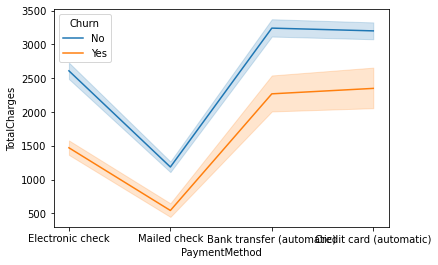

In [35]:
sns.lineplot(x='PaymentMethod',y='TotalCharges',data=df,hue='Churn')

'TotalCharges' are highest for Bank transfer (automatic) 'PaymentMethod' followed by Credit card (automatic) 'PaymentMethod' and least for Mailed check. Churned customers are less in all the 'PaymentMethod' categories as compared to non-churned customers.

In [36]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [37]:
# Continuous data
df_con=df.select_dtypes(exclude='object')

# Dropping SeniorCitizen column as this is a categorical column
df_con.drop('SeniorCitizen',axis=1,inplace=True)

df_con

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [38]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df_con))
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

There seems no outliers in tha dataset.

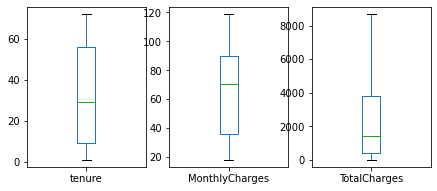

In [39]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing no presence of outliers in the columns.

In [40]:
# Checking skewness
df_con.skew()

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

Skewness is present only in one column of the dataset as acceptable range is +/-5.

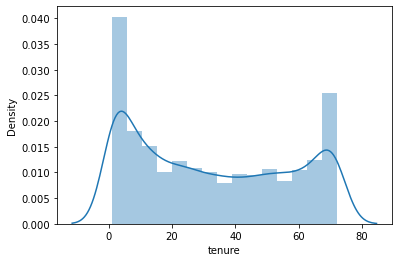

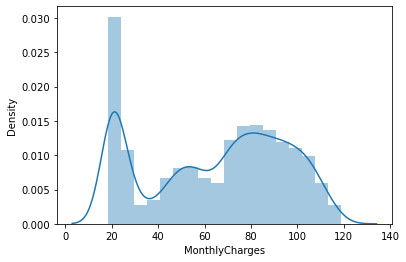

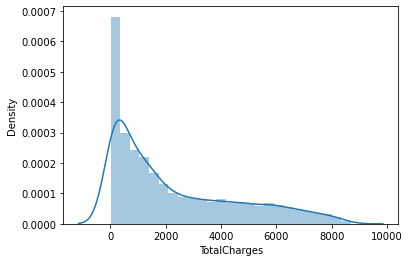

In [41]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in column 'TotalCharges'.

### Data Cleaning

In [42]:
# Removing outliers
df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [43]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (7010, 3)
Shape of dataset after removing outliers :  (7010, 3)


No outliers are present in the dataset.

In [44]:
# Checking skewness after removing outliers
df1.skew()

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

We can see now skewness is present only in column TotalCharges.

In [45]:
# Removing skewness
df2=df1.copy()
for i in df2.columns :
    if (df[i].skew()>0.5):
        df2[i]=np.log1p(df1[i]+1)
print(df2.skew())

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges     -0.732638
dtype: float64


Skewness is still there in column TotalCharges.

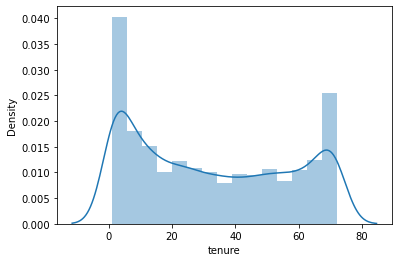

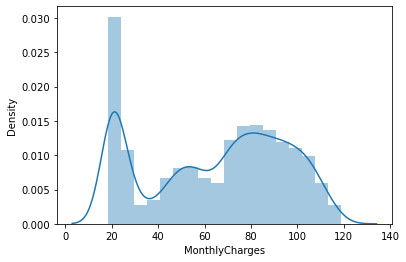

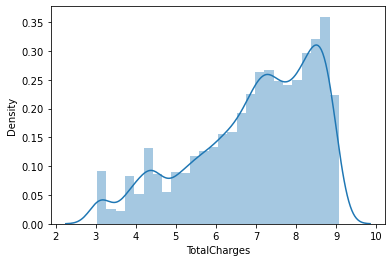

In [46]:
# Visualizng skewness
for i in df2.columns :
    sns.distplot(df2[i])
    plt.show()

Removed skewness from all columns but in column 'TotalCharges' skewness is increasing on further applying any transformations. Hence we can consider the present values as skewness threshold based on the kind of data distributions.

In [47]:
# Checking the new dataset
df2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,3.461037
1,34,56.95,7.545125
2,2,53.85,4.701843
3,45,42.30,7.519014
4,2,70.70,5.034677
...,...,...,...
7038,24,84.80,7.597145
7039,72,103.20,8.904481
7040,11,29.60,5.853495
7041,4,74.40,5.732046


### Apply encoding on categorical columns

In [48]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [49]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


Categorical columns with object datatypes are now encoded having 7021 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [50]:
# Combining all the columns
dff=pd.concat([df2,df['SeniorCitizen'],df_cat_enc],axis=1)

# Dropping nulls if any
dff.dropna(inplace=True)

# Checkinh nulls in new dataset
dff.isnull().sum().any()

False

Combined all the columns and removed nulls

In [51]:
# Checking shape of new dataset
dff.shape

(7010, 20)

New dataset is having 7010 rows and 20 columns.

In [52]:
# Checking dataset values
dff

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,3.461037,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,34,56.95,7.545125,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2,53.85,4.701843,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,45,42.30,7.519014,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,70.70,5.034677,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,7.597145,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,72,103.20,8.904481,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,11,29.60,5.853495,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,4,74.40,5.732046,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


All the required columns are encoded and are in numeric form.

### EDA and Visualizatons

In [53]:
# Describng the dataset
dff.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,6.958062,0.162767,0.504280,0.484023,0.299429,0.902996,0.943509,0.870471,0.789729,0.906705,0.904708,0.796862,0.986020,0.994009,0.690728,0.593153,1.569615,0.264907
std,24.520441,30.064769,1.529831,0.369180,0.500017,0.499780,0.458041,0.295985,0.948648,0.736546,0.860846,0.881233,0.881019,0.862557,0.886048,0.886138,0.833345,0.491281,1.066924,0.441315
min,1.000000,18.250000,3.034953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.750000,6.016919,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,29.000000,70.400000,7.248415,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,56.000000,89.900000,8.245342,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,72.000000,118.750000,9.069560,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In above table, mean and median are close to each other hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is slightly high for columns tenure and MonthlyCharges, rest all details seem good.

In [54]:
# Checking correlation
dff.corr()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
tenure,1.000000,0.244194,0.834630,0.014456,0.006370,0.379564,0.161288,0.009217,0.341092,-0.026302,0.327588,0.372391,0.372635,0.324995,0.289941,0.296141,0.675876,0.003709,-0.367462,-0.353339
MonthlyCharges,0.244194,1.000000,0.573584,0.219131,-0.012361,0.095277,-0.114641,0.249625,0.432571,-0.319423,-0.053041,0.120560,0.164735,-0.007601,0.338160,0.336738,-0.075477,0.350900,-0.189290,0.194008
TotalCharges,0.834630,0.573584,1.000000,0.099311,-0.003968,0.335563,0.090691,0.076017,0.434755,-0.199517,0.223814,0.312258,0.333067,0.236879,0.330383,0.335054,0.441938,0.143133,-0.367053,-0.240985
SeniorCitizen,0.014456,0.219131,0.099311,1.000000,-0.001069,0.016030,-0.211479,0.008724,0.145621,-0.031066,-0.127982,-0.013398,-0.021174,-0.151088,0.030946,0.047029,-0.142890,0.155922,-0.036921,0.151270
gender,0.006370,-0.012361,-0.003968,-0.001069,1.000000,-0.000583,0.010912,-0.007799,-0.006107,-0.003143,-0.015145,-0.012045,0.001250,-0.006916,-0.005662,-0.008958,0.000780,-0.011497,0.015889,-0.008694
Partner,0.379564,0.095277,0.335563,0.016030,-0.000583,1.000000,0.451254,0.019420,0.140133,0.003292,0.150372,0.152434,0.165035,0.126178,0.135781,0.128968,0.292330,-0.014856,-0.153504,-0.148670
Dependents,0.161288,-0.114641,0.090691,-0.211479,0.010912,0.451254,1.000000,-0.000408,-0.027064,0.046046,0.151016,0.089719,0.079203,0.132310,0.045470,0.021293,0.239279,-0.110973,-0.039886,-0.162366
PhoneService,0.009217,0.249625,0.076017,0.008724,-0.007799,0.019420,-0.000408,1.000000,-0.019519,0.387380,-0.013990,0.024374,0.005034,-0.017958,0.056847,0.043477,0.003872,0.017017,-0.006624,0.011072
MultipleLines,0.341092,0.432571,0.434755,0.145621,-0.006107,0.140133,-0.027064,-0.019519,1.000000,-0.106444,0.006767,0.116575,0.121931,0.010384,0.174570,0.180860,0.108741,0.164971,-0.173869,0.040181
InternetService,-0.026302,-0.319423,-0.199517,-0.031066,-0.003143,0.003292,0.046046,0.387380,-0.106444,1.000000,-0.029011,0.036332,0.045177,-0.026600,0.108283,0.098053,0.102317,-0.136588,0.081012,-0.047169


<AxesSubplot:>

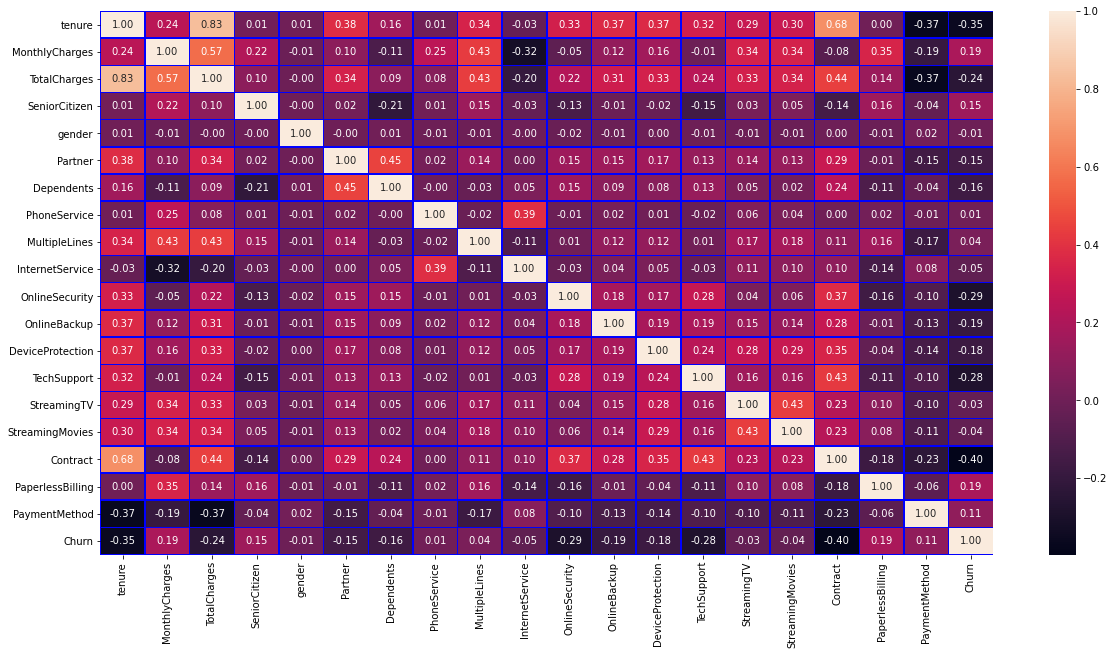

In [55]:
# Visualizing correlation
plt.figure(figsize=(20,10))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Target column 'Churn' has good negative linear correlation with 'tenure',TotalCharges','OnlineSecurity','TechSupport','Contract and least correlation with 'gender' and 'PhoneService'. 

'PaymentMethod' has good correlation with 'tenure',TotalCharges','Contract'. 'PaperlessBilling' has good correlation with 'MonthlyCharges'. 'Contract' has strong correlation with 'tenure','TotalCharges' and good correlation with 'Partner','Dependents','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'. 'StreamingMovies' has good correlation with 'tenure','MonthlyCharges','TotalCharges','DeviceProtection','StreamingTV'. 'StreamingTV' has good correlation with 'tenure','MonthlyCharges','TotalCharges','DeviceProtection'. 'TechSupport' has good correlation with 'tenure','TotalCharges','OnlineSecurity','DeviceProtection'. 'DeviceProtection' has good correlation with 'tenure','TotalCharges'. 'OnlineBackup' has good correlation with 'tenure','TotalCharges'. 'OnlineSecurity' has good correlation with 'tenure','TotalCharges'. 'InternetService' has good correlation with 'MonthlyCharges',TotalCharges','PhoneService'. 'MultipleLines' has good correlation with 'tenure','MonthlyCharges','TotalCharges'. 'PhoneService' has good correlation with 'MonthlyCharges'. 'Dependents' has good correlation with 'SeniorCitizen', 'Partner'. 'Partner' has good correlation with 'tenure','TotalCharges'. 'SeniorCitizen' has good correlation with 'MonthlyCharges'. 'TotalCharges' has good correlation with 'tenure','MonthlyCharges'. 'MonthlyCharges' has good correlation with 'tenure'. Column 'gender' has no correlation with any of the columns.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

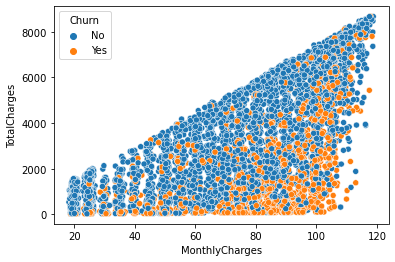

In [56]:
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'],hue=df['Churn'])

MonthlyCharges & TotalCharges showing strong positive linear correlation with the each other where churned customers are more when MonthlyCharges are high and TotalCharges are less.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

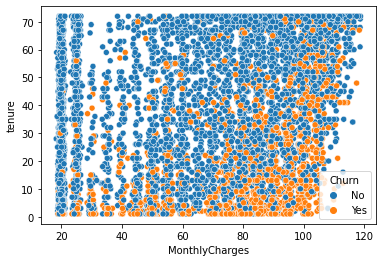

In [57]:
sns.scatterplot(df['MonthlyCharges'],df['tenure'],hue=df['Churn'])

MonthlyCharges & TotalCharges showing positive linear correlation with the each other where churned customers are more when MonthlyCharges are high and tenure is somewhat less.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

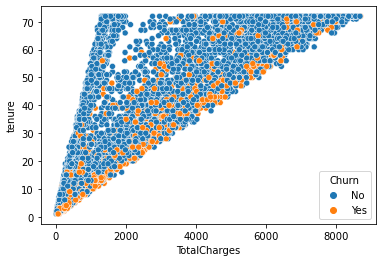

In [58]:
sns.scatterplot(df['TotalCharges'],df['tenure'],hue=df['Churn'])

Plot showing high positive correlation between TotalCharges & tenure.

### Dividing dataset in x and y

In [59]:
x=dff.drop('Churn',axis=1)
x

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,3.461037,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,34,56.95,7.545125,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,2,53.85,4.701843,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,45,42.30,7.519014,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,2,70.70,5.034677,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,7.597145,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,72,103.20,8.904481,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,11,29.60,5.853495,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,4,74.40,5.732046,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [60]:
y=dff['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int32

In [61]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (7010, 19)
Shape of y :  (7010,)


### Multicollinearity with VIF

In [62]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Checking for multicollinearity
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,tenure,11.542502
1,MonthlyCharges,18.131052
2,TotalCharges,41.861930
3,SeniorCitizen,1.371675
4,gender,1.988273
5,Partner,2.827110
6,Dependents,1.969066
7,PhoneService,16.031881
8,MultipleLines,2.770503
9,InternetService,4.302222


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [65]:
from sklearn.preprocessing import StandardScaler
x1=x.copy()
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.285566,-1.165523,-2.286053,-0.440921,-1.008596,1.032482,-0.653764,-3.051036,0.059553,-1.181912,-0.917452,1.240732,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418
1,0.060346,-0.264071,0.383772,-0.440921,0.991477,-0.968540,-0.653764,0.327757,-0.994654,-1.181912,1.406009,-1.028979,1.243300,-0.923902,-1.112909,-1.121811,0.371148,-1.207445,1.340759
2,-1.244781,-0.367189,-1.474921,-0.440921,0.991477,-0.968540,-0.653764,0.327757,-0.994654,-1.181912,1.406009,1.240732,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,1.340759
3,0.508983,-0.751387,0.366702,-0.440921,0.991477,-0.968540,-0.653764,-3.051036,0.059553,-1.181912,1.406009,-1.028979,1.243300,1.394950,-1.112909,-1.121811,0.371148,-1.207445,-1.471264
4,-1.244781,0.193308,-1.257343,-0.440921,-1.008596,-0.968540,-0.653764,0.327757,-0.994654,0.175873,-0.917452,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,-0.347506,0.662329,0.417778,-0.440921,0.991477,1.032482,1.529603,0.327757,1.113760,-1.181912,1.406009,-1.028979,1.243300,1.394950,1.144467,1.135335,0.371148,0.828195,1.340759
7006,1.610184,1.274384,1.272401,-0.440921,-1.008596,1.032482,1.529603,0.327757,1.113760,0.175873,-0.917452,1.240732,1.243300,-0.923902,1.144467,1.135335,0.371148,0.828195,-0.533923
7007,-0.877714,-1.173839,-0.722071,-0.440921,-1.008596,1.032482,1.529603,-3.051036,0.059553,-1.181912,1.406009,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418
7008,-1.163210,0.316384,-0.801463,2.267980,0.991477,1.032482,-0.653764,0.327757,1.113760,0.175873,-0.917452,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,1.340759


### Find best random state for Train-Test Split

In [66]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=i)
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    #if round(acctrain,1)==round(acctest,1) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  21  Accuracy(Training) :  99.85734664764621  Accuracy(Testing) :  74.96433666191156


Here, training & testing accuracies are almost same for random state=21. So, lets take 21 as our best random state.

In [68]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5608, 19)
(1402, 19)
(5608,)
(1402,)


In [69]:
y_train.value_counts()

0    4108
1    1500
Name: Churn, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Class Imbalance

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [71]:
trainy.value_counts()

0    4108
1    4108
Name: Churn, dtype: int64

### Finding the best algorithm

In [72]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [73]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,rf,xg]
for i in algo_list :
    print(i)
    i.fit(trainx,trainy)
    predtrain=i.predict(trainx)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(trainy,predtrain)
    acctest=accuracy_score(y_test,predtest)
    err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  78.16455696202532  Accuracy(Test)  76.31954350927246  Mean absolute error :  0.23680456490727533
[[784 261]
 [ 71 286]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1045
           1       0.52      0.80      0.63       357

    accuracy                           0.76      1402
   macro avg       0.72      0.78      0.73      1402
weighted avg       0.82      0.76      0.78      1402



DecisionTreeClassifier()
Accuracy(Training) :  99.90262901655306  Accuracy(Test)  73.68045649072754  Mean absolute error :  0.2631954350927247
[[828 217]
 [152 205]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1045
           1       0.49      0.57      0.53       357

    accuracy                           0.74      1402
   macro avg       0.67      0.68      0.67      1402
weighted avg       0.75      0.74      0.74      1402



RandomForestC

RandomForestClassifier has the highest accuracy but let's go for cross validation for all the models used.

In [76]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=4).mean()*100)

CV mean of  LogisticRegression()  is  80.77031025743214
CV mean of  DecisionTreeClassifier()  is  72.85310146728244
CV mean of  RandomForestClassifier()  is  78.91589792579974
CV mean of  GradientBoostingClassifier()  is  80.1568316024454


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 80% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [77]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=4)
GCV.fit(trainx,trainy)
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [80]:
rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=4).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.797432239657632  CV mean :  0.7860200354512943


#### We are getting model accuracy as approx 80% and cv mean as 0.79 for both the parameter sets, this shows our model is performing good.

### AUC-ROC Curve

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [82]:
pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
#print(fpr,tpr,thresholds)

Calculating fpr,tpr,thresholds for selected model

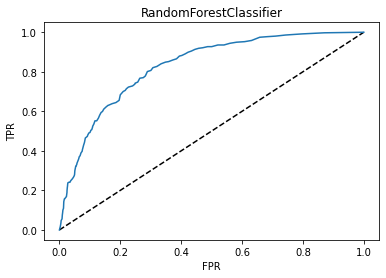

In [83]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [84]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.7945791726105563
ROC_AUC score :  0.8283717314677066


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [87]:
# Saved the model in .pkl file
import pickle #import joblib
file='churn.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [88]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.7945791726105563

In [89]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(1402, 19)
(1402,)


In [91]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[10:40]

,Orignal,Predicted
10,0,0
11,0,0
12,0,0
13,0,0
14,0,0
15,0,0
16,1,1
17,0,0
18,1,1
19,0,0
